In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
#import plotly.express as px
import warnings  

# Ignore all warnings  
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
%matplotlib inline

#Loard Dataset

In [27]:
df = pd.read_csv('./Data/raw/student_depression_dataset.csv')

In [28]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [30]:
df.shape

(27901, 18)

In [31]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [ ]:
df.loc[df.duplicated()]

In [ ]:
df_copy = df.copy()
df_copy.loc[len(df)] = df.loc[len(df) - 1]

#Data Cleaning & Preprocessing

In [32]:
# Convert 'Depression' to integer (if not already)
df['Depression'] = df['Depression'].astype(int)

# Convert columns that should be categorical
cat_cols = ['Gender', 'City', 'Profession', 'Degree',
            'Have you ever had suicidal thoughts ?', 
            'Family History of Mental Illness']
for col in cat_cols:
    df[col] = df[col].astype('category')

# Check unique values in some columns to decide cleaning strategy
print("Unique values in 'Sleep Duration':", df['Sleep Duration'].unique())
print("Unique values in 'Financial Stress':", df['Financial Stress'].unique())

Unique values in 'Sleep Duration': ["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']
Unique values in 'Financial Stress': ['1.0' '2.0' '5.0' '3.0' '4.0' '?']


In [7]:
df.loc[df.duplicated()]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [8]:
df_copy = df.copy()
df_copy.loc[len(df)] = df.loc[len(df) - 1]

In [9]:
df_copy.loc[df_copy.duplicated()]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27901,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1


In [10]:
df_copy.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1
27901,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1


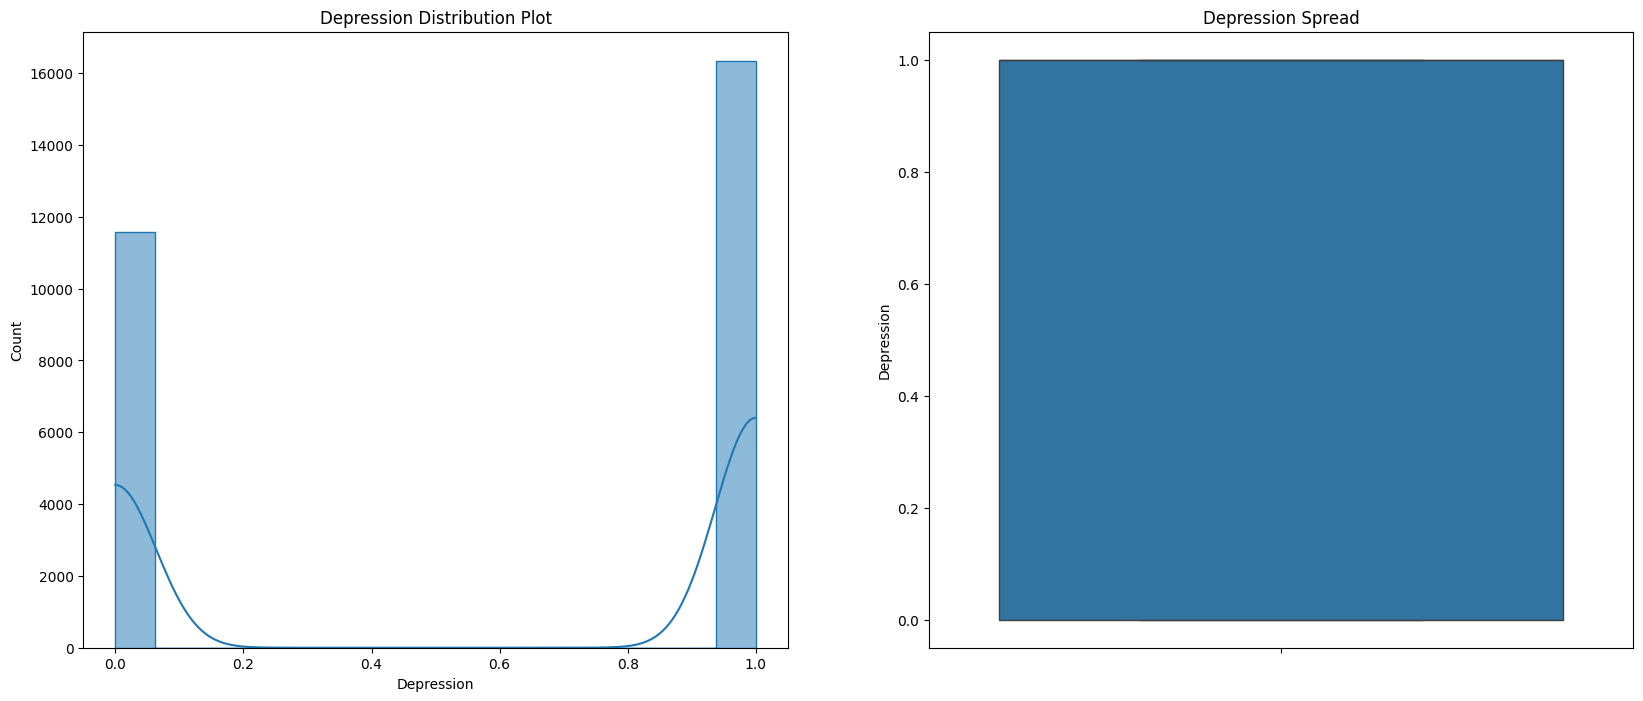

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Depression Distribution Plot')
sns.histplot(df.Depression, kde=True, element='step')

plt.subplot(1,2,2)
sns.boxplot(df.Depression)
plt.title('Depression Spread')


plt.show()

In [12]:
categorical_features = [x for x in df.columns if df[x].dtype =='object']

In [13]:
categorical_features

['Gender',
 'City',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Financial Stress',
 'Family History of Mental Illness']

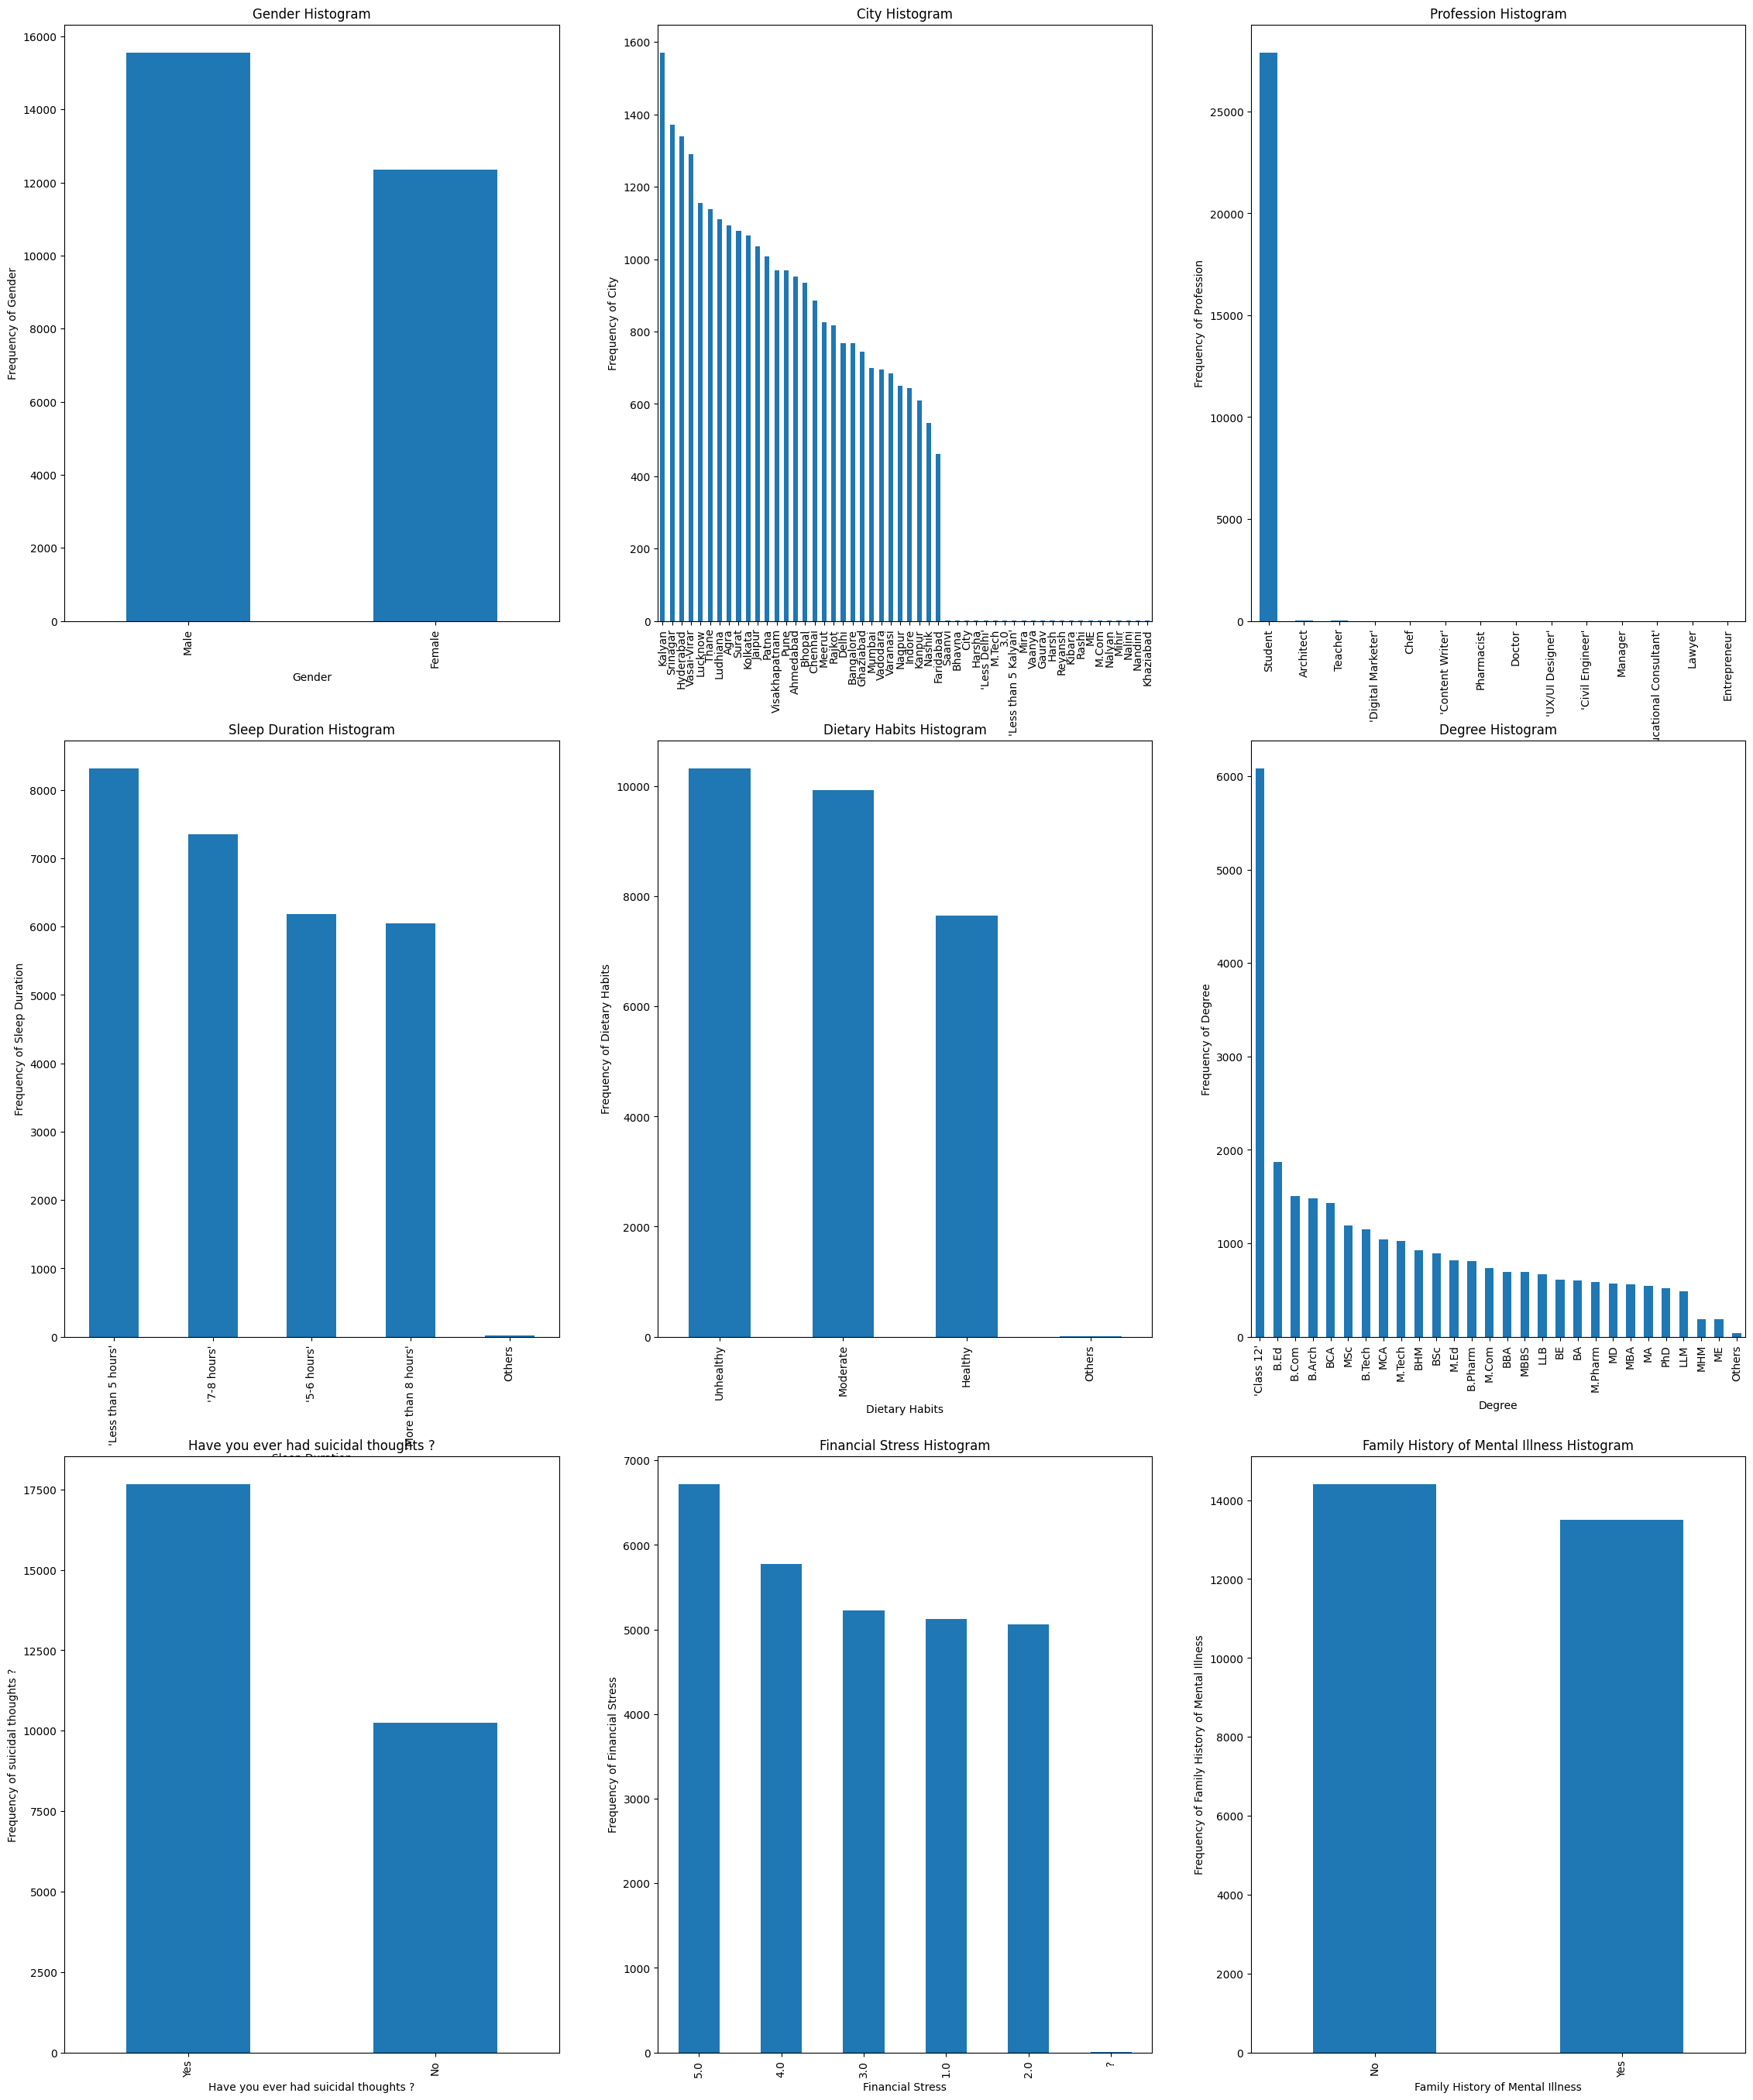

In [14]:
plt.figure(figsize=(28, 34))

plt.subplot(3, 3, 1)
plt1 = df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Histogram')
plt1.set(xlabel = 'Gender', ylabel='Frequency of Gender')

plt.subplot(3, 3, 2)
plt1 = df['City'].value_counts().plot(kind='bar')
plt.title('City Histogram')
plt1.set(xlabel = 'City', ylabel='Frequency of City')

plt.subplot(3, 3, 3)
plt1 = df['Profession'].value_counts().plot(kind='bar')
plt.title('Profession Histogram')
plt1.set(xlabel = 'Profession', ylabel='Frequency of Profession')

plt.subplot(3, 3, 4)
plt1 = df['Sleep Duration'].value_counts().plot(kind='bar')
plt.title('Sleep Duration Histogram')
plt1.set(xlabel = 'Sleep Duration', ylabel='Frequency of Sleep Duration')

plt.subplot(3, 3, 5)
plt1 = df['Dietary Habits'].value_counts().plot(kind='bar')
plt.title('Dietary Habits Histogram')
plt1.set(xlabel = 'Dietary Habits', ylabel='Frequency of Dietary Habits')

plt.subplot(3, 3, 6)
plt1 = df['Degree'].value_counts().plot(kind='bar')
plt.title('Degree Histogram')
plt1.set(xlabel = 'Degree', ylabel='Frequency of Degree')

plt.subplot(3, 3, 7)
plt1 = df['Have you ever had suicidal thoughts ?'].value_counts().plot(kind='bar')
plt.title('Have you ever had suicidal thoughts ?')
plt1.set(xlabel = 'Have you ever had suicidal thoughts ?', ylabel='Frequency of suicidal thoughts ?')

plt.subplot(3, 3, 8)
plt1 = df['Financial Stress'].value_counts().plot(kind='bar')
plt.title('Financial Stress Histogram')
plt1.set(xlabel = 'Financial Stress', ylabel='Frequency of Financial Stress')

plt.subplot(3, 3, 9)
plt1 = df['Family History of Mental Illness'].value_counts().plot(kind='bar')
plt.title('Family History of Mental Illness Histogram')
plt1.set(xlabel = 'Family History of Mental Illness', ylabel='Frequency of Family History of Mental Illness')

plt.show()

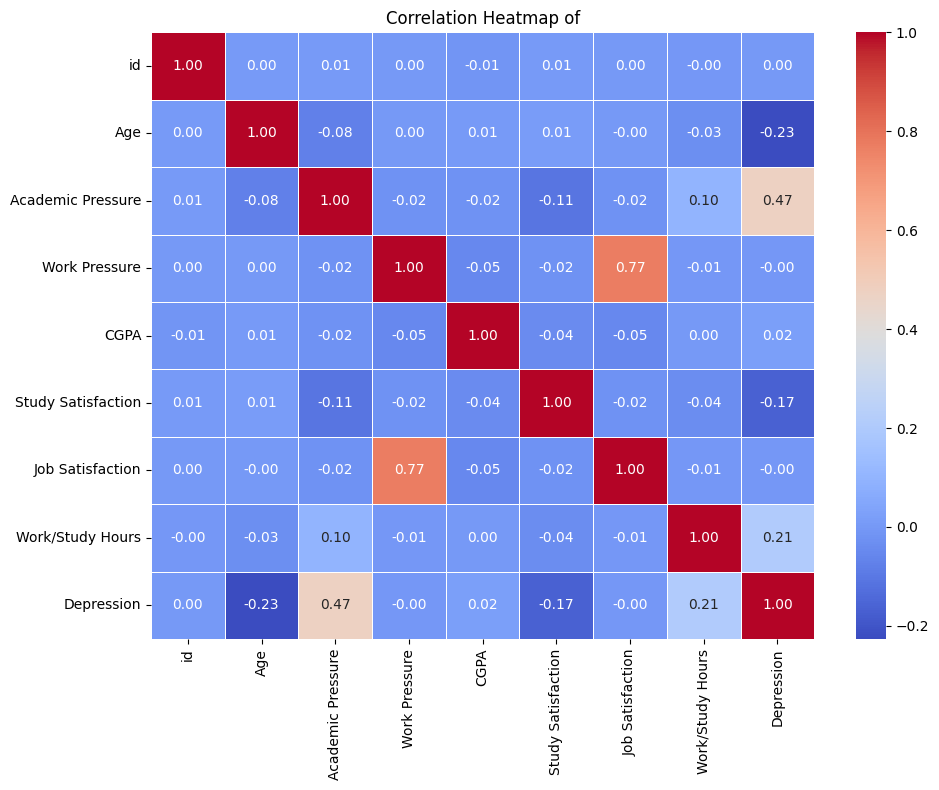

In [15]:
numerical_df=df.select_dtypes(include=['number'])
corr=numerical_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)

plt.title('Correlation Heatmap of')
plt.tight_layout()
plt.show()

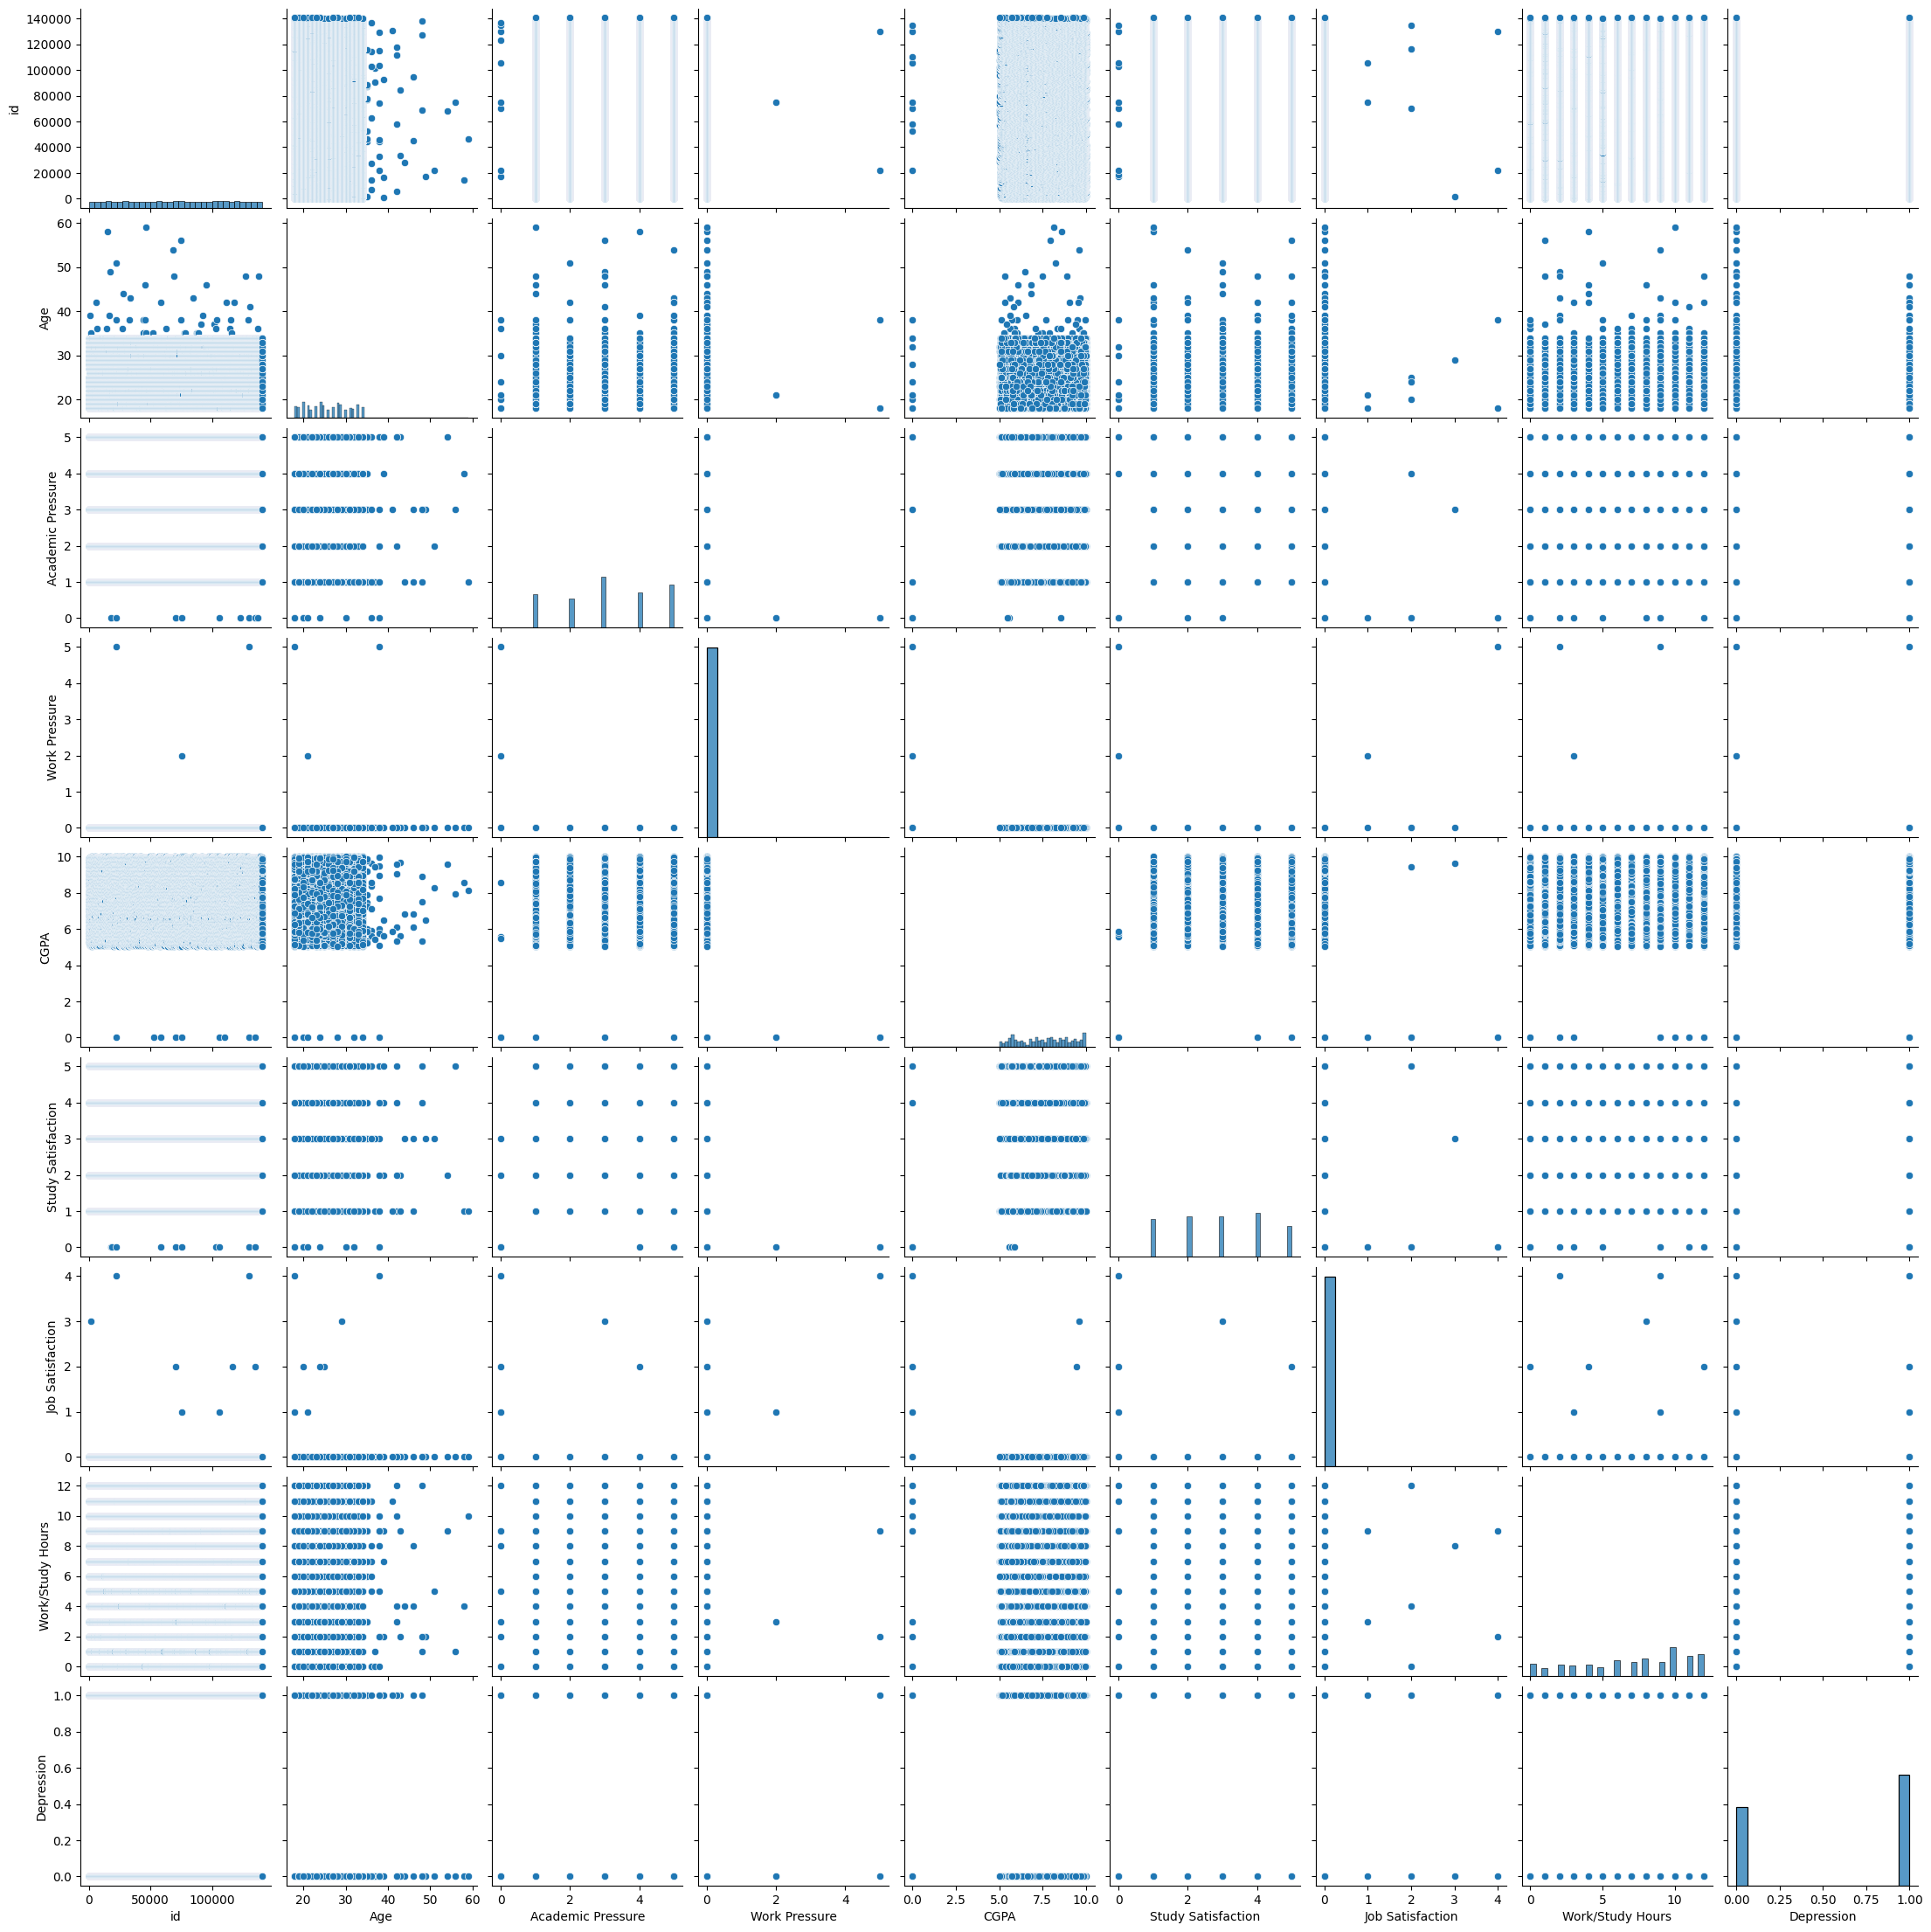

In [16]:
sns.pairplot(numerical_df)
plt.show()

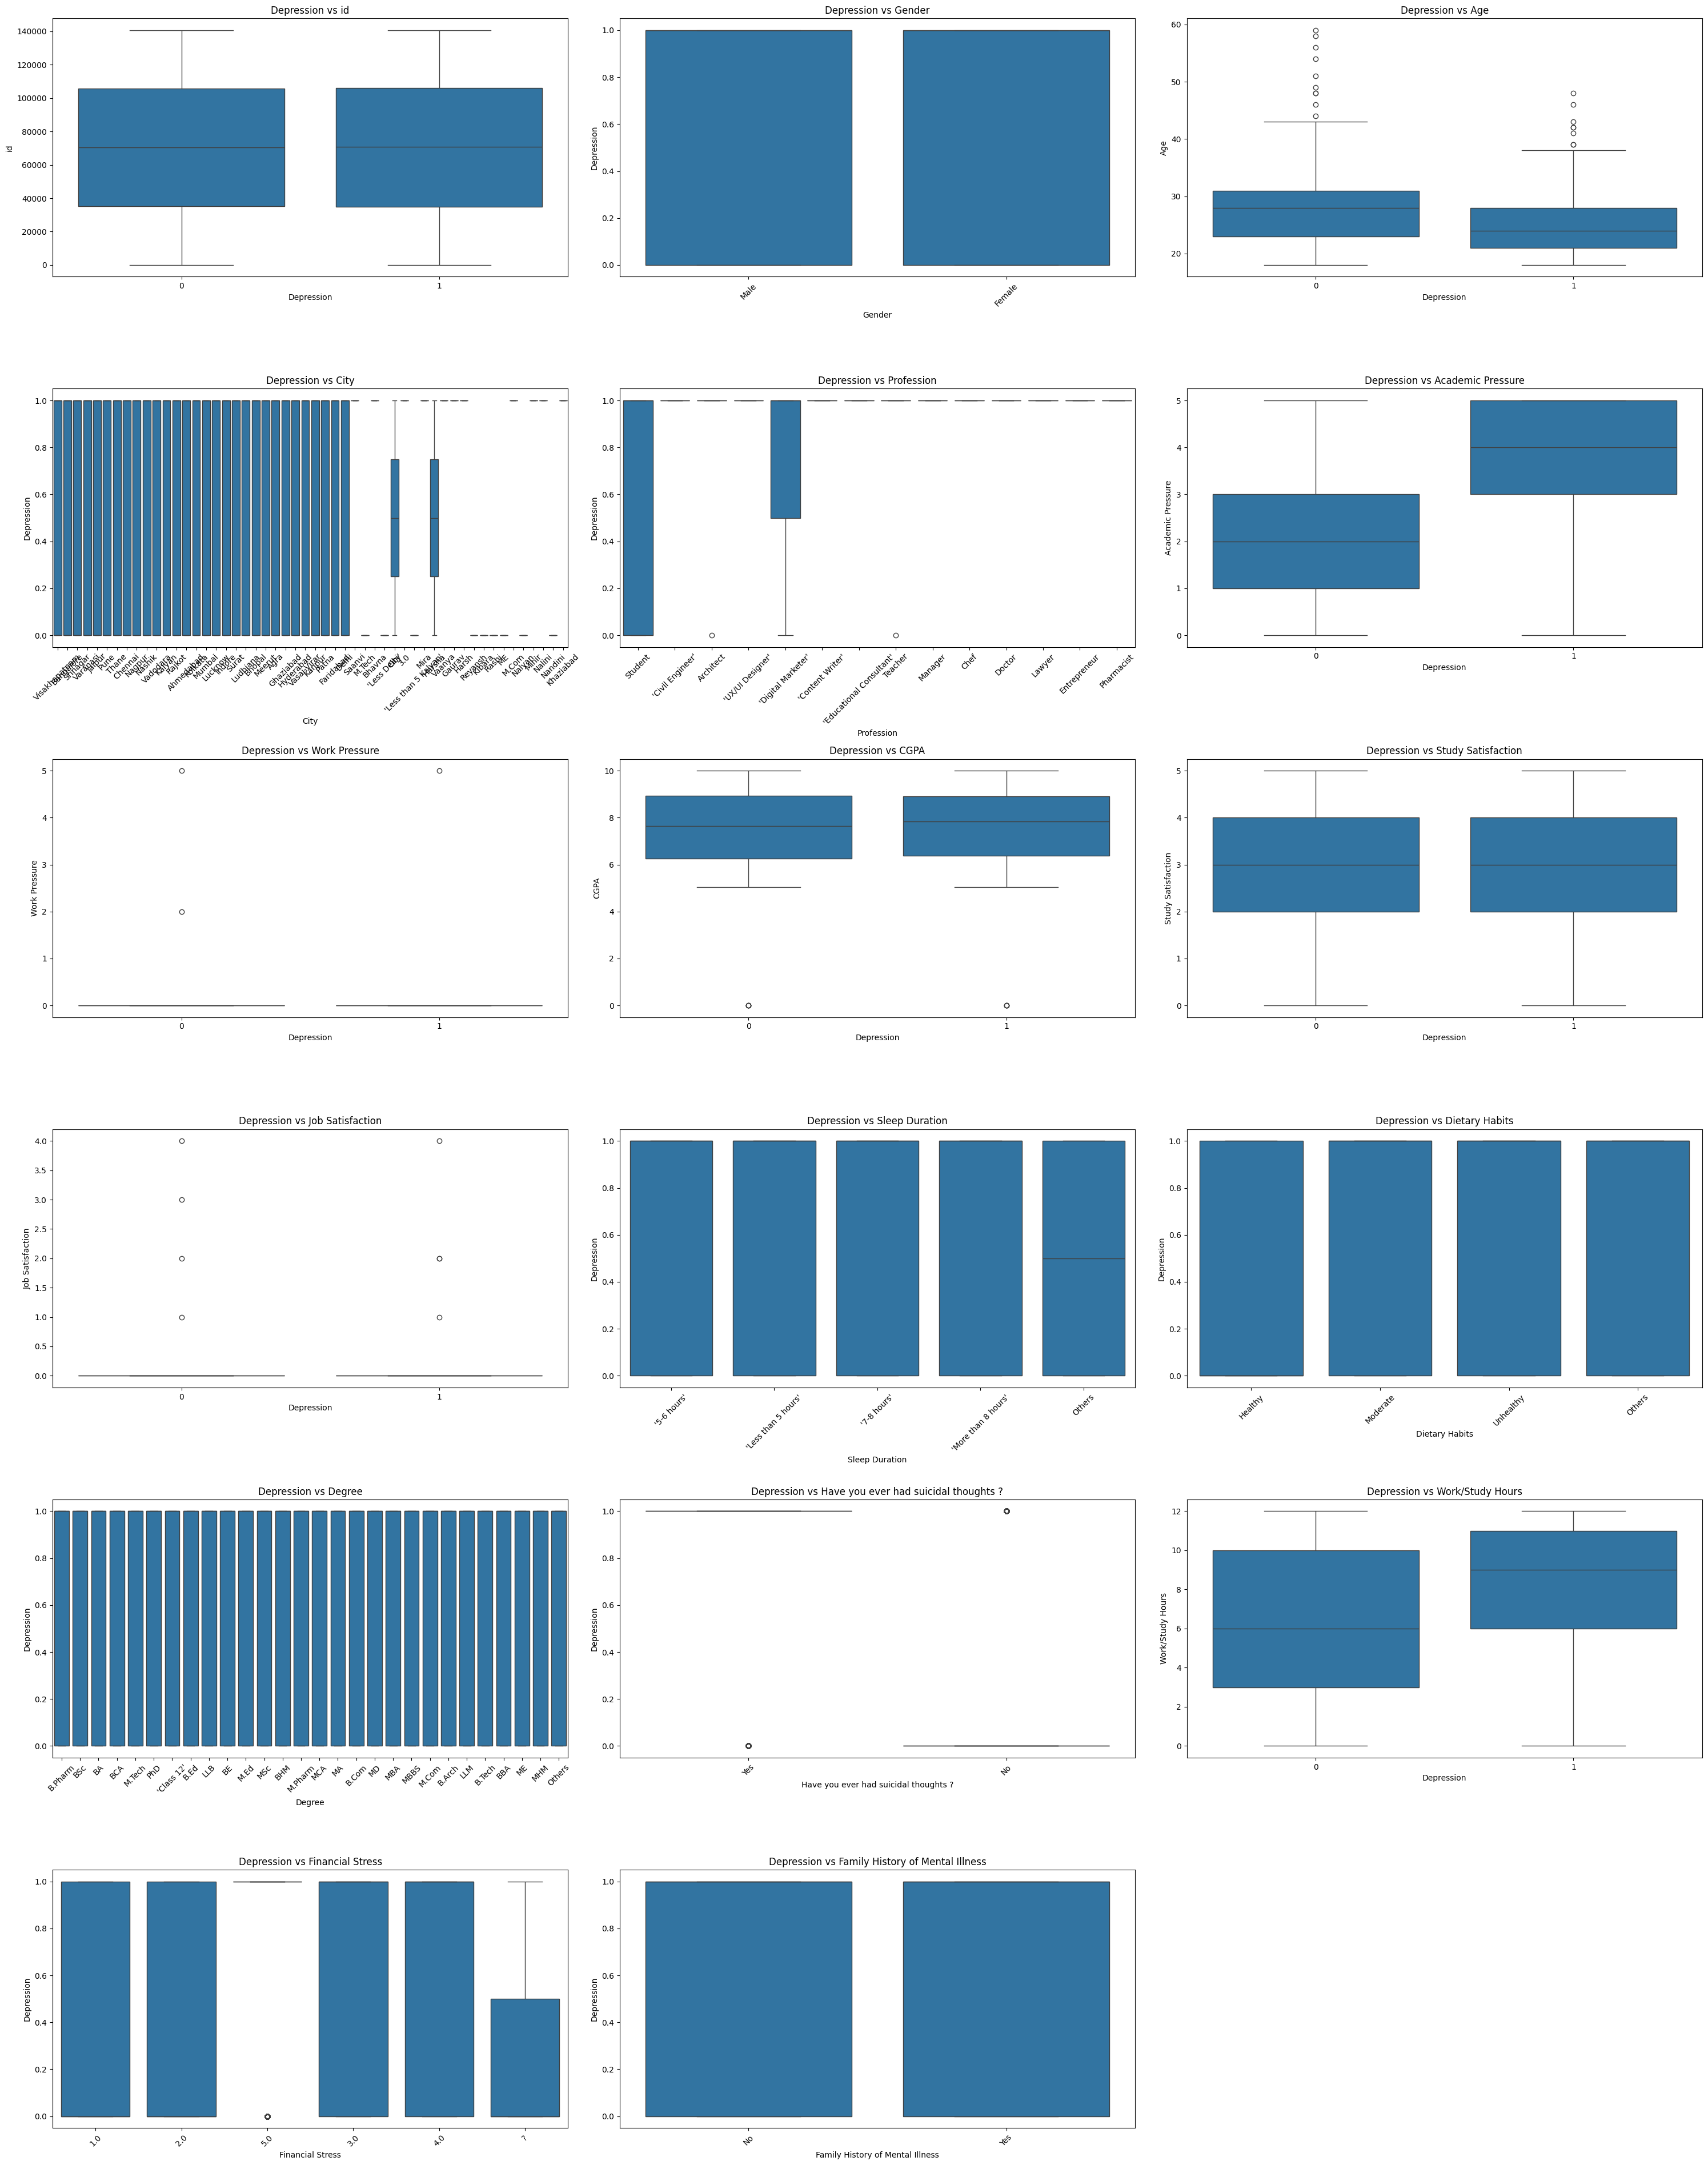

In [17]:
features = [col for col in df.columns if col != 'Depression']

plt.figure(figsize=(30, 38))
plot_num = 1

for feature in features:
    plt.subplot((len(features) + 2) // 3, 3, plot_num)
    if df[feature].dtype == 'object':
        sns.boxplot(x=feature, y='Depression', data=df)
        plt.xticks(rotation=45)
    else:
        sns.boxplot(x='Depression', y=feature, data=df)
    plt.title(f'Depression vs {feature}')
    plot_num += 1

plt.tight_layout()
plt.show()